# Assignment for Week 3 - Naive-Bayes

## Project: Text Classification

**Data Set:** spam.csv located at [https://www.kaggle.com/uciml/sms-spam-collection-dataset/version/1](https://www.kaggle.com/uciml/sms-spam-collection-dataset/version/1)

**Note:** you might want to use encoding of `latin-1` when loading this file (https://www.kaggle.com/benvozza/spam-classification)

**Objective:** to classify SMS message as spam or not spam (ham).

From the given data set, use Naïve Bayes to classify the SMS message. The framework for text classification is briefly summarized here:

- Transformation of your dataset(change to lower case, remove numbers, remove punctuation, stop words, white space, word stemming, etc.)
- Document-Term-Matrix creation – matrix of word counts for each individual document in the matrix (e.g. documents as rows, words as columns or vice versa)
- Text Analysis (e.g. word counts, visualizations using wordclouds)

**Helpful links:**<br>
https://machinelearningmastery.com/clean-text-machine-learning-python/<br>
http://textminingonline.com/dive-into-nltk-part-iv-stemming-and-lemmatization<br>
https://machinelearningmastery.com/prepare-text-data-machine-learning

**Analysis Questions:**<br>
- What is the accuracy of the model? Report your finding with corresponding tables/graphs.
- Print the 5 most frequent words in each class, and their posterior probability generated by the model.
- How would you improve the model performance?
- If the data set is bigger, do you think the accuracy increases? Discuss.

## Introduction
***

The dataset this week is SMS text messages from (https://www.kaggle.com/benvozza/spam-classification) which we will be specifying whether it is spam or not. The machine learning method for this week is Naive Bayes (NB) which we will implement in a way where each word will have a calculated likelihood of being spam. Our NB classifier will determine the class off of the product of the probabilities by word. Before we can do this we will need to transform our dataset by removing stopwords, creating a uniform text, and tokenizing our text into a document-term-matrix. We will then analyze the resulting matrices, tune our classifier, and discuss the next steps for improvement.

### Setup

In [1]:
# Standard Setup
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Text Analytics
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve

# Regex
import re

# NB
from sklearn.naive_bayes import MultinomialNB

# Warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
!head assign_wk3/spam.csv

In [3]:
spam_df = pd.read_csv('assign_wk3/spam.csv', encoding='latin-1')

In [4]:
spam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
spam_df[spam_df['Unnamed: 2'].notnull()]

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
95,spam,Your free ringtone is waiting to be collected....,PO Box 5249,"MK17 92H. 450Ppw 16""",NaN
281,ham,\Wen u miss someone,the person is definitely special for u..... B...,why to miss them,"just Keep-in-touch\"" gdeve.."""
444,ham,\HEY HEY WERETHE MONKEESPEOPLE SAY WE MONKEYAR...,HOWU DOIN? FOUNDURSELF A JOBYET SAUSAGE?LOVE ...,NaN,NaN
671,spam,SMS. ac sun0819 posts HELLO:\You seem cool,"wanted to say hi. HI!!!\"" Stop? Send STOP to ...",NaN,NaN
710,ham,Height of Confidence: All the Aeronautics prof...,"this wont even start........ Datz confidence..""",NaN,NaN
899,spam,Your free ringtone is waiting to be collected....,PO Box 5249,"MK17 92H. 450Ppw 16""",NaN
1038,ham,"Edison has rightly said, \A fool can ask more ...",GN,GE,"GNT:-)"""
1127,ham,"Height of \Oh shit....!!\"" situation: A guy th...",".;-):-D""",NaN,NaN
1266,ham,\Hey sorry I didntgive ya a a bellearlier hunny,just been in bedbut mite go 2 thepub l8tr if u...,NaN,NaN
1384,ham,"Storming msg: Wen u lift d phne, u say \HELLO\...","bt not his girlfrnd... G o o d n i g h t . . .@""",NaN,NaN


## Text Transformation

We will start our text transformation by regularizing capitalization, removing stopwords, removing numbers, performing a lemmatization, and finally tokenize our documents.

In [6]:
# Pull in our list of english stopwords
eng_stopwords = stopwords.words('english')

**Lowercase**

In [7]:
# Start our clean_text with lowercase v2
spam_df['clean_text'] = [line.lower() for line in spam_df['v2']]

In [8]:
def extendCleanText(df, col):
    for idx, row in df.iterrows():
        if str(row[col]) != 'nan':
            row['clean_text'] += str(row[col]).lower()

In [9]:
extendCleanText(spam_df, 'Unnamed: 2')
extendCleanText(spam_df, 'Unnamed: 3')
extendCleanText(spam_df, 'Unnamed: 4')

In [10]:
spam_df['clean_text']

0       go until jurong point, crazy.. available only ...
1                           ok lar... joking wif u oni...
2       free entry in 2 a wkly comp to win fa cup fina...
3       u dun say so early hor... u c already then say...
4       nah i don't think he goes to usf, he lives aro...
                              ...                        
5567    this is the 2nd time we have tried 2 contact u...
5568                will ì_ b going to esplanade fr home?
5569    pity, * was in mood for that. so...any other s...
5570    the guy did some bitching but i acted like i'd...
5571                           rofl. its true to its name
Name: clean_text, Length: 5572, dtype: object

**Remove Numbers**

In [11]:
spam_df['clean_text'] = spam_df['clean_text'].str.replace('\d+','')
spam_df['clean_text']

0       go until jurong point, crazy.. available only ...
1                           ok lar... joking wif u oni...
2       free entry in  a wkly comp to win fa cup final...
3       u dun say so early hor... u c already then say...
4       nah i don't think he goes to usf, he lives aro...
                              ...                        
5567    this is the nd time we have tried  contact u. ...
5568                will ì_ b going to esplanade fr home?
5569    pity, * was in mood for that. so...any other s...
5570    the guy did some bitching but i acted like i'd...
5571                           rofl. its true to its name
Name: clean_text, Length: 5572, dtype: object

**Remove Punctuation**

In [12]:
spam_df['clean_text'] = spam_df['clean_text'].str.replace('[^\w\s]','')
spam_df['clean_text']

0       go until jurong point crazy available only in ...
1                                 ok lar joking wif u oni
2       free entry in  a wkly comp to win fa cup final...
3             u dun say so early hor u c already then say
4       nah i dont think he goes to usf he lives aroun...
                              ...                        
5567    this is the nd time we have tried  contact u u...
5568                 will ì_ b going to esplanade fr home
5569    pity  was in mood for that soany other suggest...
5570    the guy did some bitching but i acted like id ...
5571                            rofl its true to its name
Name: clean_text, Length: 5572, dtype: object

**Remove Stopwords**

In [13]:
spam_df['clean_text'] = spam_df['clean_text'].apply(lambda x: ' '.join(w for w in x.split() if w not in eng_stopwords))
spam_df['clean_text']

0       go jurong point crazy available bugis n great ...
1                                 ok lar joking wif u oni
2       free entry wkly comp win fa cup final tkts st ...
3                     u dun say early hor u c already say
4             nah dont think goes usf lives around though
                              ...                        
5567    nd time tried contact u u å pound prize claim ...
5568                         ì_ b going esplanade fr home
5569                          pity mood soany suggestions
5570    guy bitching acted like id interested buying s...
5571                                       rofl true name
Name: clean_text, Length: 5572, dtype: object

**Lemmatize**

In [14]:
# I am choosing to use the WordNetLemmatizer for stemming our text, but there are a variety that we could use to try
# to get better results.
nltk.download('wordnet')
nltk.download('omw-1.4')

wordnet_lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/tosterberg/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /home/tosterberg/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [15]:
spam_df['clean_text'] = spam_df['clean_text'].apply(lambda x: " ".join(wordnet_lemmatizer.lemmatize(w) for w in x.split()))
spam_df['clean_text']

0       go jurong point crazy available bugis n great ...
1                                 ok lar joking wif u oni
2       free entry wkly comp win fa cup final tkts st ...
3                     u dun say early hor u c already say
4                nah dont think go usf life around though
                              ...                        
5567    nd time tried contact u u å pound prize claim ...
5568                         ì_ b going esplanade fr home
5569                           pity mood soany suggestion
5570    guy bitching acted like id interested buying s...
5571                                       rofl true name
Name: clean_text, Length: 5572, dtype: object

Now that we have validated our preprocessing by doing it a line at a time, lets turn it into a pipeline function so that we can apply it as we go, and swap out different pieces using grid search later if we want to.

In [16]:
# Created a prepocess function based on the preprocess function in 
# https://www.kaggle.com/code/benvozza/spam-classification/notebook

def pre_process(text):
    
    # lowercase
    text = text.lower()
    
    # remove punctuation
    text = re.sub('[^\w\s]','', text)
    
    # remove numbers
    text = re.sub('\d+','', text)
    
    # remove stopwords
    text = [word for word in text.split() if word not in eng_stopwords]
    
    # replace with stem words
    words = ''
    for word in text:
        words += ''.join(wordnet_lemmatizer.lemmatize(word))
        words += ' '
    return words

In [17]:
spam_df['preprocess'] = spam_df['v2'].apply(pre_process)

In [18]:
spam_df['preprocess']

0       go jurong point crazy available bugis n great ...
1                                ok lar joking wif u oni 
2       free entry wkly comp win fa cup final tkts st ...
3                    u dun say early hor u c already say 
4               nah dont think go usf life around though 
                              ...                        
5567    nd time tried contact u u å pound prize claim ...
5568                        ì_ b going esplanade fr home 
5569                          pity mood soany suggestion 
5570    guy bitching acted like id interested buying s...
5571                                      rofl true name 
Name: preprocess, Length: 5572, dtype: object

**Classification**

Before we start we should check and see what the distribution of spam and ham is inside of our data set so that we can get a feel for the impact of our classifier when compared to just returning the mode response.

In [19]:
# Check the likelihood of our classes
spam_df['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

In [20]:
print(f'{1-747/(747+4825):%}')

86.593683%


Okay, it looks like we are getting 86.59% ham in this dataset, so improvement over this accuracy is our goal.

In [21]:
# list of text documents
text = spam_df['preprocess']
# create the transform
vectorizer = CountVectorizer()
# tokenize and build vocab
vectorizer.fit(text)
# encode document
vector = vectorizer.transform(text)

In [22]:
text = spam_df['preprocess'].copy()
X = vectorizer.fit_transform(text)
y = spam_df['v1']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Multinomial Naive Bayes Classifier
mnb = MultinomialNB(alpha=0.2)
mnb.fit(x_train, y_train)
prediction = mnb.predict(x_test)
accuracy_score(y_test,prediction)

0.9614349775784753

In [24]:
# list of text documents
text = spam_df['preprocess']
# create the transform
vectorizer = TfidfVectorizer()
# tokenize and build vocab
vectorizer.fit(text)
# encode document
vector = vectorizer.transform(text)

In [25]:
text = spam_df['preprocess'].copy()
X = vectorizer.fit_transform(text)
y = spam_df['v1']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Multinomial Naive Bayes Classifier
mnb = MultinomialNB(alpha=0.2)
mnb.fit(x_train, y_train)
prediction = mnb.predict(x_test)
accuracy_score(y_test,prediction)

0.9766816143497757

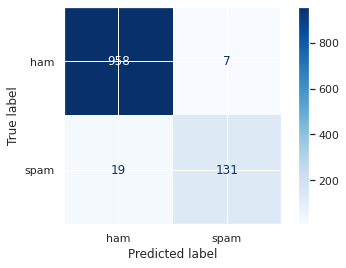

In [28]:
plot_confusion_matrix(mnb, x_test, y_test, cmap='Blues')

Our accuracy is 97.67% when using our preprocessing pipeline, wordnet lemmatization, and the TfidVectorizer.

**Most Frequent Words by Class**

In [29]:
def split_df(df, col, value):
    a = df[df[col] == value]
    b = df[df[col] != value]
    return [a, b]

In [35]:
# Split our df into ham and spam for further analysis
ham, spam = split_df(spam_df, 'v1', 'ham')
ham.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,clean_text,preprocess
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,go jurong point crazy available bugis n great ...,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,ok lar joking wif u oni,ok lar joking wif u oni
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,u dun say early hor u c already say,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,nah dont think go usf life around though,nah dont think go usf life around though
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN,even brother like speak treat like aid patent,even brother like speak treat like aid patent


In [34]:
ham_tokens = ' '.join(ham.preprocess).split()
spam_tokens = ' '.join(spam.preprocess).split()
ham_tokens[:10]

['go',
 'jurong',
 'point',
 'crazy',
 'available',
 'bugis',
 'n',
 'great',
 'world',
 'la']

In [46]:
freq = pd.Series(' '.join(spam_df.preprocess).split()).value_counts().to_dict()
ham_freq = pd.Series(' '.join(ham.preprocess).split()).value_counts().to_dict()
spam_freq = pd.Series(' '.join(spam.preprocess).split()).value_counts().to_dict()

- Top five most frequent words for 'ham' messages

In [48]:
list(freq.items())[:10]

[('u', 1206),
 ('call', 602),
 ('im', 464),
 ('get', 401),
 ('ur', 384),
 ('go', 308),
 ('dont', 279),
 ('free', 278),
 ('ok', 277),
 ('ltgt', 276)]

In [68]:
ham_5 = list(ham_freq.items())[:5]
ham_5

[('u', 1043), ('im', 451), ('get', 318), ('ltgt', 276), ('go', 275)]

In [42]:
wc = WordCloud(width=1000, height=600, max_words=200).generate_from_frequencies(ham_freq)

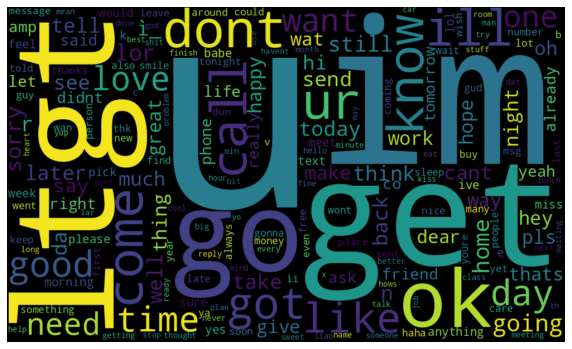

In [43]:
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

- Top five most frequent words in spam messages

In [67]:
spam_5 = list(spam_freq.items())[:5]
spam_5

[('call', 361), ('å', 270), ('free', 219), ('u', 163), ('txt', 150)]

In [44]:
wc = WordCloud(width=1000, height=600, max_words=200).generate_from_frequencies(spam_freq)

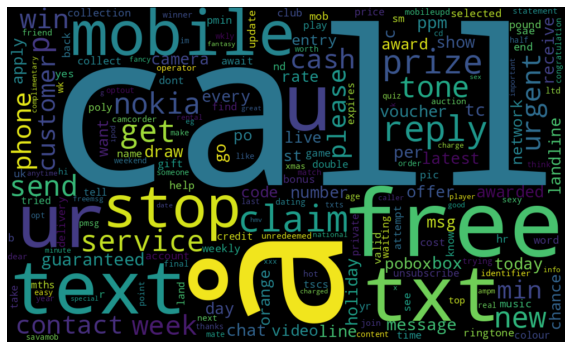

In [45]:
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [53]:
# Class prior probability
spam_prob = spam.count()[0] / spam_df.count()[0]
ham_prob = ham.count()[0] / spam_df.count()[0]

In [59]:
# Predictor prior probability
def pred_prob(word):
    return freq[word] / spam_df.count()[0]

In [60]:
def class_likelihood(word, df, freq):
    return freq[word] / df.count()[0]

In [73]:
def post_prob(word, df, freq, class_prob):
    prob = class_likelihood(word, df, freq) * class_prob / pred_prob(word)
    print(f'{word.ljust(7)}: {prob:.4f}')

- Posterior probabilities of the top 5 ham and spam words

In [77]:
print('Posterior probabilities for the top 5 words being ham')
for word in ham_5:
    post_prob(word[0], ham, ham_freq, ham_prob)

Posterior probabilities for the top 5 words being ham
u      : 0.8648
im     : 0.9720
get    : 0.7930
ltgt   : 1.0000
go     : 0.8929


In [78]:
print('Posterior probabilities for the top 5 words being spam')
for word in spam_5:
    post_prob(word[0], spam, spam_freq, spam_prob)

Posterior probabilities for the top 5 words being spam
call   : 0.5997
å      : 0.9854
free   : 0.7878
u      : 0.1352
txt    : 0.9202


**How would we improve the model?**

For us to improve our model from here there are several avenues that we might take. Being methodical, we should start by going through our preprocessing steps and addressing those that can be done in other ways. The first is our stopwords list. We are using the NLTK corpus of english stopwords, but this is not the only list of stopwords out there. We would try a different list, or combining lists, or adding in other languages of stopwords if we don't beleive that the text is all english in our dataset. The second options would be for us to use a different stemming strategy. I chose the word net lemmatization, but the snowball stemming strategy is used in the reference kaggle competition document so we could perform a search through stemming strategies to find the optimal one for this model. Lastly, we could use a different classifier, or a different implementation of Naive Bayes for this model and compare with all of the other changes we could make in a grid search to find the best configuration for detecting spam.

**Would our model improve with more data?**

This is an interesting question because it kind points to the heart of Bayes theorem. If we believe Bayes Theorem then we would have to say that more data will better refine the posterior probabilities in our classifier and will improve the classification that it predicts. I think that this could get us into an area of flawed reasoning if we were to continue this collection for a very long period of time. I say this for a few reasons. The first is that colloquialisms change over time as well as the semantic meaning of text. Because of this the kinds of conversations being had between young adults in the next generation could have a very different structure than todays. We don't want all of the conversations being pinned to a previous generations use of the language. Another reason would be the adversarial nature of spam detection where spammers will likely change the way that they spam in order to bypass these filtering systems over time.

## References:

Martulandi, Adipta. “A Gentle Introduction to Naive Bayes Classifier.” Medium, 18 Nov. 2019, https://medium.datadriveninvestor.com/a-gentle-introduction-to-naive-bayes-classifier-9d7c4256c999.

Brownlee, Jason. “How to Encode Text Data for Machine Learning with Scikit-Learn.” Machine Learning Mastery, 28 Sept. 2017, https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/.

NLP, GloVe, BERT, TF-IDF, LSTM, Explained. https://kaggle.com/andreshg/nlp-glove-bert-tf-idf-lstm-explained. Accessed 22 May 2022.